In [1]:
%run "../../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


patient="hand2"
ampm="am"
file="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20ampm=%27"+ampm+"%27%20AND%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"

fileName = file;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,pname,date,ampm,time,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,hand2,2015-01-02,am,06:24:00,279,Y,22.700,0.004,0.700,0.025,0.024,145.000,0.078,12.790,0.428,0.300,990.300,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,340.000,58.000,2.100,-13.600,1020.500,1025.000,-4.800,-3.900,1022.200,63.000,-8.500,1019.600,35.000,4.600,2.600,28.000
1,hand2,2015-01-03,am,07:19:00,251,Y,24.917,0.009,0.900,0.026,0.035,54.000,0.125,17.045,0.299,0.584,886.283,0.005,0.684,0.012,0.023,35.570,-9.600,0.600,180.000,71.000,2.100,-13.800,1022.700,1027.200,-6.900,-0.800,1023.400,71.000,-9.600,1019.900,31.000,8.800,3.500,40.000
2,hand2,2015-01-04,am,07:46:00,260,Y,24.450,0.013,1.000,0.015,0.039,52.000,0.174,16.975,0.180,0.797,857.550,0.007,0.694,0.007,0.033,35.074,0.700,1.600,70.000,67.000,4.300,-4.700,1013.600,1017.900,-0.700,1.900,1023.400,71.000,-9.600,1013.200,38.000,11.500,10.200,33.000
3,hand2,2015-01-05,am,06:08:00,273,Y,22.367,0.009,1.300,0.021,0.065,75.000,0.137,22.300,0.106,1.078,1248.967,0.006,0.997,0.005,0.048,55.841,-2.800,0.000,0.000,100.000,5.000,-2.800,1016.200,1020.600,-2.800,7.600,1017.500,100.000,-2.800,1012.900,59.000,10.400,4.600,41.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,hand2,2016-10-16,am,07:17:00,260,Y,25.283,0.004,1.100,0.045,0.059,105.000,0.086,19.070,0.332,1.090,1863.967,0.003,0.754,0.013,0.043,73.723,16.700,1.000,110.000,77.000,14.600,12.600,1017.500,1021.600,15.200,26.100,1023.500,100.000,11.200,1017.500,35.000,14.900,6.000,65.000
654,hand2,2016-10-17,am,06:11:00,292,Y,22.900,0.004,0.700,0.028,0.037,74.000,0.073,13.440,0.279,0.642,1261.567,0.003,0.587,0.012,0.028,55.090,15.000,0.800,340.000,97.000,16.500,14.500,1013.400,1017.500,15.300,19.400,1017.600,100.000,15.000,1012.600,60.000,4.400,5.000,40.000
655,hand2,2016-10-18,am,06:00:00,286,Y,22.817,0.004,0.900,0.055,0.039,72.000,0.066,12.690,0.453,0.625,1205.467,0.003,0.556,0.020,0.027,52.833,11.900,0.600,250.000,100.000,13.800,11.800,1016.100,1020.200,12.900,22.400,1016.200,100.000,11.900,1013.000,55.000,10.500,3.200,45.000
656,hand2,2016-10-19,am,06:28:00,311,G,24.467,0.007,1.000,0.032,0.064,104.000,0.118,18.420,0.199,1.045,1752.667,0.005,0.753,0.008,0.043,71.635,11.700,0.000,0.000,100.000,13.700,11.600,1014.900,1019.000,11.900,20.800,1018.100,100.000,11.000,1014.900,61.000,9.800,3.200,39.000


In [2]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 

df=df.reset_index(drop=True)

#2. Combine 
df=df.fillna(0)
sdttm = df.date + " " + df.time
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, pname, date, time, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, temperature_diff, airpressure_diff, precipitation_diff, tm_window".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pef, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)





columns =  '''pef_zone,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,
 temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min'''

#'''pefcat,pef_zone,so2_max,co_max,o3_max,no2_max,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
#dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,temperature_min'''

 
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,pef_zone,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02 06:24:00,Y,0.004,0.700,0.025,0.024,145.000,0.078,12.790,0.428,0.300,990.300,0.003,0.563,0.019,0.013,43.626,-6.800,1.200,340.000,58.000,2.100,-13.600,1020.500,1025.000,-4.800,-3.900,1022.200,63.000,-8.500,1019.600,35.000
2015-01-03 07:19:00,Y,0.009,0.900,0.026,0.035,54.000,0.125,17.045,0.299,0.584,886.283,0.005,0.684,0.012,0.023,35.570,-9.600,0.600,180.000,71.000,2.100,-13.800,1022.700,1027.200,-6.900,-0.800,1023.400,71.000,-9.600,1019.900,31.000
2015-01-04 07:46:00,Y,0.013,1.000,0.015,0.039,52.000,0.174,16.975,0.180,0.797,857.550,0.007,0.694,0.007,0.033,35.074,0.700,1.600,70.000,67.000,4.300,-4.700,1013.600,1017.900,-0.700,1.900,1023.400,71.000,-9.600,1013.200,38.000
2015-01-05 06:08:00,Y,0.009,1.300,0.021,0.065,75.000,0.137,22.300,0.106,1.078,1248.967,0.006,0.997,0.005,0.048,55.841,-2.800,0.000,0.000,100.000,5.000,-2.800,1016.200,1020.600,-2.800,7.600,1017.500,100.000,-2.800,1012.900,59.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-16 07:17:00,Y,0.004,1.100,0.045,0.059,105.000,0.086,19.070,0.332,1.090,1863.967,0.003,0.754,0.013,0.043,73.723,16.700,1.000,110.000,77.000,14.600,12.600,1017.500,1021.600,15.200,26.100,1023.500,100.000,11.200,1017.500,35.000
2016-10-17 06:11:00,Y,0.004,0.700,0.028,0.037,74.000,0.073,13.440,0.279,0.642,1261.567,0.003,0.587,0.012,0.028,55.090,15.000,0.800,340.000,97.000,16.500,14.500,1013.400,1017.500,15.300,19.400,1017.600,100.000,15.000,1012.600,60.000
2016-10-18 06:00:00,Y,0.004,0.900,0.055,0.039,72.000,0.066,12.690,0.453,0.625,1205.467,0.003,0.556,0.020,0.027,52.833,11.900,0.600,250.000,100.000,13.800,11.800,1016.100,1020.200,12.900,22.400,1016.200,100.000,11.900,1013.000,55.000
2016-10-19 06:28:00,G,0.007,1.000,0.032,0.064,104.000,0.118,18.420,0.199,1.045,1752.667,0.005,0.753,0.008,0.043,71.635,11.700,0.000,0.000,100.000,13.700,11.600,1014.900,1019.000,11.900,20.800,1018.100,100.000,11.000,1014.900,61.000


In [3]:
# from sklearn.neural_network import MLPClassifier
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# clf = nn;

# Y_SCALER = None
# #Normalize the input and save the scalar for outcome variable "pefmax" in this case.
# scaler = StandardScaler()
# dp = prepareDF(df1, True)
# for c in dp.columns:
#     if ( c == 'pefcat'):
#         #Y_SCALER = StandardScaler()
#         #dp[c] = Y_SCALER.fit_transform(dp[c])
#         pass;
#     else:
#         dp[c] = scaler.fit_transform(dp[c])
        
# #dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
# dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

# X = dp1.ix[:, dp1.columns != 'pefcat']
# y = dp1.pefcat 
# X = X.as_matrix().astype(np.float)


# kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
# y_pred = y.copy()

# # Iterate through folds\
# i = 0;
# for train_index, test_index in kf.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train = y[train_index]
#     # Initialize a classifier with key word arguments\
#     print ("*",i, end ="");
#     clf.fit(X_train,y_train)
#     y_pred[test_index] = clf.predict(X_test)
#     i = i +1;



Feature space holds 657 observations and 30 features
Unique target labels: ['Y' 'G']
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.777778 
   DecisionTree Gini r^2 score: -0.425078
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.762557 
   DecisionTree Entr r^2 score: -0.522686
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.806697 
                 SVM r^2 score: -0.239623
* 0* 1* 2* 3* 4*
       Random Forest accuracy: 0.774734 
       Random Forest r^2 score: -0.444600
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.761035 
                K-NN r^2 score: -0.532447
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.762557 
   Gradient Boosting r^2 score: -0.522686
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.808219 
    Logit Regression r^2 score: -0.229862
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.675799 
         Naive Bayes r^2 score: -1.079052


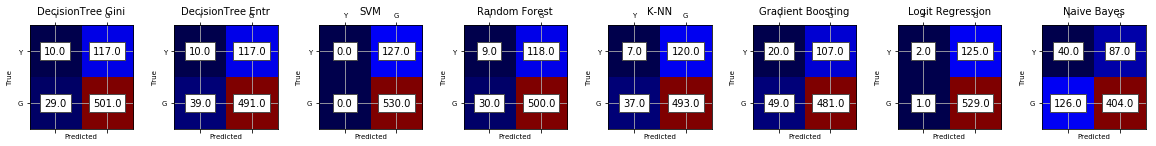

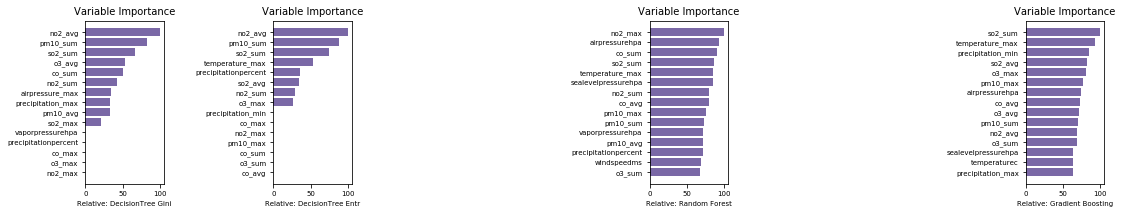

DecisionTree Gini Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1       0.81      0.95      0.87       530
    class 2       0.00      0.00      0.00       127

avg / total       0.65      0.76      0.70       657

DecisionTree Entr Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1       0.81      0.93      0.86       530
    class 2       0.00      0.00      0.00       127

avg / total       0.65      0.75      0.70       657

SVM Metrics
             precision    recall  f1-score   support

    class 0       0.81      1.00      0.89       530
    class 1       0.00      0.00      0.00       127

avg / total       0.65      0.81      0.72       657

Random Forest Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         0
    class 1       0.81      0.94      0.87       530
   

In [4]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "pef_zone"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)

for i in cls:
    if type(i) is str:
        y_pred = a[4][i]
        target_names = ['class 0', 'class 1', 'class 2']
        print(i + ' Metrics')
        y.replace(to_replace="R", value=0, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="G", value=2, inplace=True, limit=None, regex=False, method='pad', axis=None)
        print(classification_report(y, y_pred, target_names=target_names))


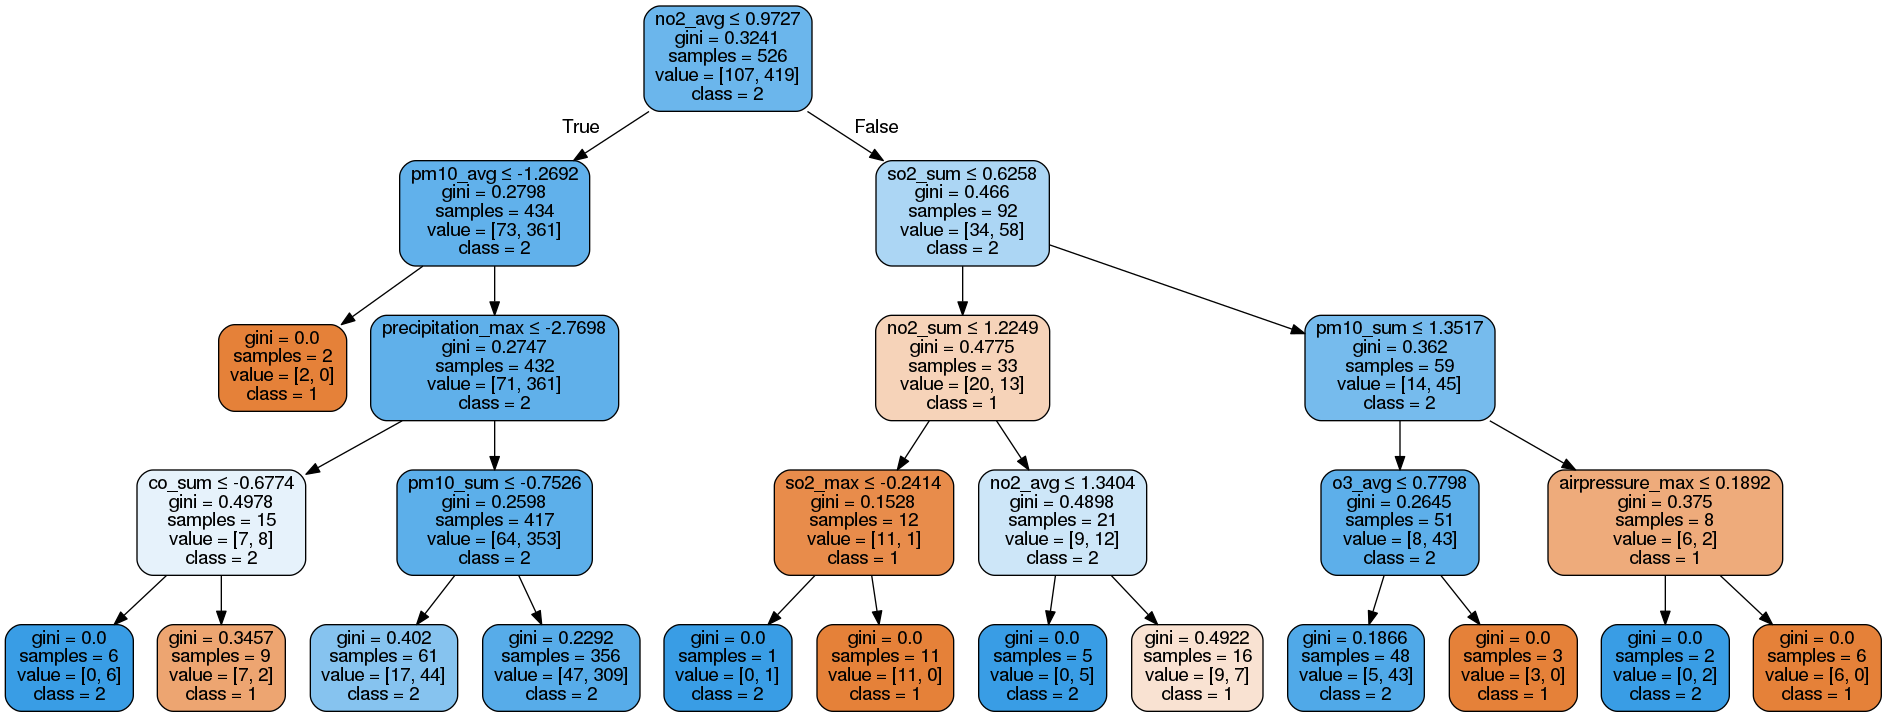

In [5]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])
